In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("./train.csv")

# Extract the selected features and target variable
selected_features = ['GrLivArea', 'YearBuilt']
target_variable = 'SalePrice'

# Create a new DataFrame with the selected features and target variable
selected_df = df[selected_features + [target_variable]]

# Display the first few rows of the selected DataFrame
print(selected_df.head())


   GrLivArea  YearBuilt  SalePrice
0       1710       2003     208500
1       1262       1976     181500
2       1786       2001     223500
3       1717       1915     140000
4       2198       2000     250000


In [4]:
pip install scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


Mean Squared Error (MSE): 2495554898.6683216


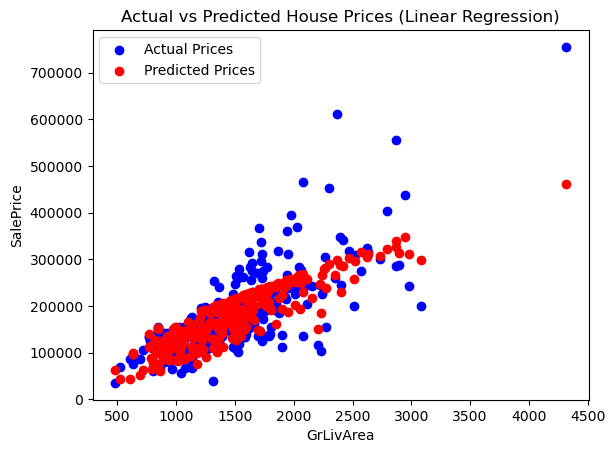

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("train.csv")

# Extract the selected features and target variable
selected_features = ['GrLivArea', 'YearBuilt']
target_variable = 'SalePrice'

# Create a new DataFrame with the selected features and target variable
selected_df = df[selected_features + [target_variable]]

# Split the data into features and target variable
X = selected_df[selected_features]
y = selected_df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Visualization
plt.scatter(X_test['GrLivArea'], y_test, color='blue', label='Actual Prices')
plt.scatter(X_test['GrLivArea'], y_pred, color='red', label='Predicted Prices')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Actual vs Predicted House Prices (Linear Regression)')
plt.legend()
plt.show()


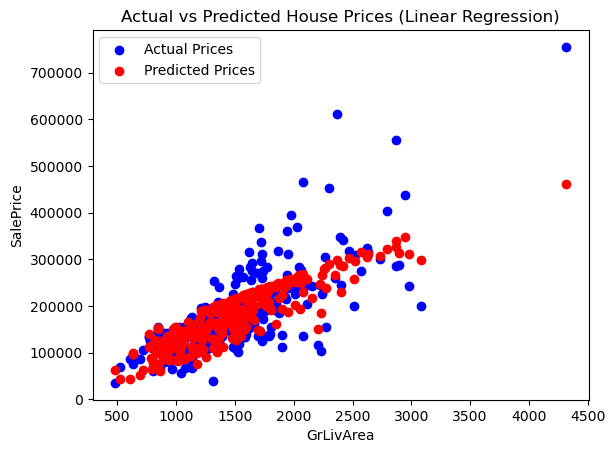

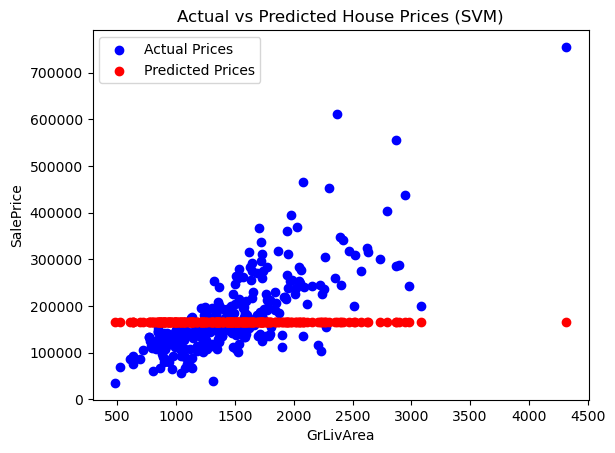

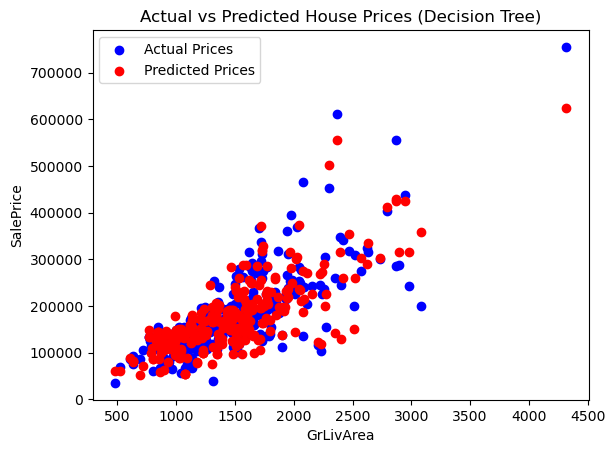

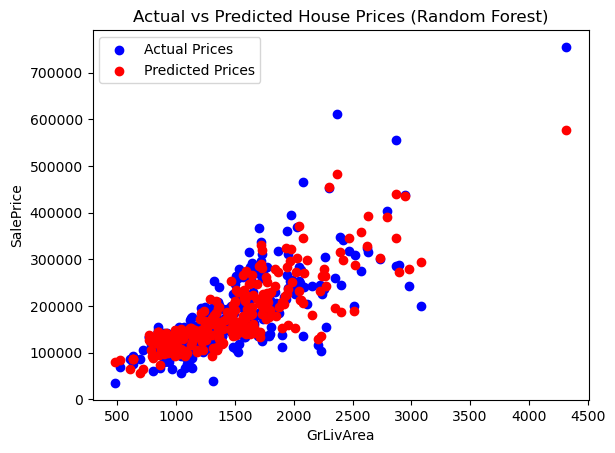

              Method  Mean Squared Error (MSE)
0  Linear Regression              2.495555e+09
1                SVM              7.844111e+09
2      Decision Tree              2.206798e+09
3      Random Forest              1.632927e+09


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("train.csv")

# Extract the selected features and target variable
selected_features = ['GrLivArea', 'YearBuilt']
target_variable = 'SalePrice'

# Create a new DataFrame with the selected features and target variable
selected_df = df[selected_features + [target_variable]]

# Split the data into features and target variable
X = selected_df[selected_features]
y = selected_df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Training, estimation, evaluation, and visualization
results = {'Method': [], 'Mean Squared Error (MSE)': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model using Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Visualization
    plt.scatter(X_test['GrLivArea'], y_test, color='blue', label='Actual Prices')
    plt.scatter(X_test['GrLivArea'], y_pred, color='red', label='Predicted Prices')
    plt.xlabel('GrLivArea')
    plt.ylabel('SalePrice')
    plt.title(f'Actual vs Predicted House Prices ({name})')
    plt.legend()
    plt.show()
    
    # Save results
    results['Method'].append(name)
    results['Mean Squared Error (MSE)'].append(mse)

# Summarize results in a table
results_df = pd.DataFrame(results)
print(results_df)


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("train.csv")

# Select features and target variable
features = df.drop(['Id', 'SalePrice'], axis=1)  # Exclude 'Id' and 'SalePrice'
target_variable = 'SalePrice'

# Remove non-numeric columns for simplicity (you may handle them differently)
numeric_features = features.select_dtypes(include=['int64', 'float64'])

# Fill missing values with mean for simplicity (you may handle them differently)
numeric_features = numeric_features.fillna(numeric_features.mean())

# Split the data into features and target variable
X = numeric_features
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Training, estimation, evaluation
results = {'Method': [], 'Mean Squared Error (MSE)': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model using Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Save results
    results['Method'].append(name)
    results['Mean Squared Error (MSE)'].append(mse)

# Summarize results in a table
results_df = pd.DataFrame(results)
print(results_df)


              Method  Mean Squared Error (MSE)
0  Linear Regression              1.356493e+09
1                SVM              7.859248e+09
2      Decision Tree              1.835543e+09
3      Random Forest              8.663977e+08
